# Import 

In [3]:
import grid2op
from grid2op.PlotGrid import PlotMatplot 
from grid2op.utils import ScoreL2RPN2020
from grid2op.Runner import Runner
from grid2op.Reward import *
from grid2op.Action import *
import numpy as np
import pdb
import os
import pickle
import copy
import matplotlib.pyplot as plt

from train import train as trainDDQN
from evaluate import evaluate as evaluateDDQN
from DoubleDuelingDQN import DoubleDuelingDQN as D3QNAgent

# Training

In [2]:
# create an environment
env = grid2op.make('l2rpn_neurips_2020_track1_large_train',
                   action_class=TopologyChangeAndDispatchAction,
                   reward_class=CombinedScaledReward)
train_iter = 150000
agent_name = "DDQN_Agent_large"
save_path = "models\saved_agent_DDQN_large_{}".format(train_iter)
logs_dir="tf_logs_DDQN_large"
batch_size = 32 
num_pre_training_steps = 0
num_frames = 4
learning_rate = 0.00001

# Only load 128 steps in ram
env.chronics_handler.set_chunk_size(128)

# Register custom reward for training
cr = env._reward_helper.template_reward
#cr.addReward("overflow", CloseToOverflowReward(), 1.0)
cr.addReward("game", GameplayReward(), 1.0)
#cr.addReward("recolines", LinesReconnectedReward(), 1.0)
cr.addReward("l2rpn", L2RPNReward(), 2.0/float(env.n_line))
# Initialize custom rewards
cr.initialize(env)
# Set reward range to something managable
cr.set_range(-1.0, 1.0)

env.seed(0)

trainDDQN(env,
          name=agent_name,
          iterations=train_iter,
          save_path=save_path,
          load_path=None, 
          logs_path=logs_dir,
          num_frames = num_frames,
          num_pre_training_steps= num_pre_training_steps,
          batch_size=batch_size,
          learning_rate=learning_rate)

Step [0] -- Random [0.99]
Survived [9] steps
Total reward [6.366107940673828]
Survived [1] steps
Total reward [-0.14637422561645508]
Survived [11] steps
Total reward [6.489159345626831]
Survived [2] steps
Total reward [0.7155182361602783]
Survived [6] steps
Total reward [2.611295223236084]
Survived [5] steps
Total reward [3.2575443983078003]
Survived [6] steps
Total reward [4.044936299324036]
Survived [9] steps
Total reward [6.184532523155212]
Survived [5] steps
Total reward [3.118693470954895]
Survived [3] steps
Total reward [1.4103713035583496]
Survived [4] steps
Total reward [1.6350908279418945]
Survived [1] steps
Total reward [-0.21867728233337402]
Survived [11] steps
Total reward [6.390279173851013]
Survived [6] steps
Total reward [3.3354380130767822]
Survived [4] steps
Total reward [1.6313639283180237]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.193885087966919]
Survived [9] steps
Total reward [5.416957259178162

Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5343860387802124]
Survived [11] steps
Total reward [6.910855829715729]
Survived [3] steps
Total reward [1.5038139820098877]
Survived [6] steps
Total reward [3.188386857509613]
Survived [3] steps
Total reward [0.7217190265655518]
Survived [8] steps
Total reward [4.864405989646912]
Survived [2] steps
Total reward [0.6965476274490356]
Survived [11] steps
Total reward [7.726463735103607]
loss = 14.962723
Survived [7] steps
Total reward [3.6030577421188354]
Survived [9] steps
Total reward [5.614336431026459]
Survived [3] steps
Total reward [1.575931191444397]
Survived [5] steps
Total reward [1.6849315166473389]
Survived [5] steps
Total reward [3.231902003288269]
Survived [1] steps
Total reward [-0.2002854347229004]
Survived [5] steps
Total reward [3.2501957416534424]
Survived [3] steps
Total reward [1.4910551309585571]
Survived [1] steps
Total reward [-0.14675211906433105]
loss = 15.902769
Survived [10] steps
Total re

Survived [1] steps
Total reward [-0.18109869956970215]
Survived [4] steps
Total reward [2.3048601150512695]
Survived [2] steps
Total reward [0.7076172828674316]
Survived [4] steps
Total reward [2.3489283323287964]
Survived [5] steps
Total reward [1.6455677151679993]
Survived [5] steps
Total reward [3.222702145576477]
Survived [5] steps
Total reward [3.084436535835266]
loss = 11.129105
Survived [5] steps
Total reward [1.1759626269340515]
Survived [8] steps
Total reward [5.213263273239136]
Survived [5] steps
Total reward [2.48716002702713]
Survived [2] steps
Total reward [0.6724655628204346]
Survived [1] steps
Total reward [-0.1567906141281128]
Survived [6] steps
Total reward [3.404758930206299]
Survived [8] steps
Total reward [4.2181315422058105]
Survived [0] steps
Total reward [-1.0]
Survived [7] steps
Total reward [3.445596218109131]
Survived [2] steps
Total reward [0.61557936668396]
loss = 8.761536
Survived [8] steps
Total reward [4.689291059970856]
Survived [3] steps
Total reward [1

Survived [5] steps
Total reward [3.2211230993270874]
Survived [3] steps
Total reward [1.4782700538635254]
Survived [7] steps
Total reward [4.216362178325653]
Survived [4] steps
Total reward [2.4265613555908203]
Survived [0] steps
Total reward [-1.0]
loss = 7.864174
Survived [4] steps
Total reward [2.3880419731140137]
Survived [4] steps
Total reward [2.3597038984298706]
Survived [5] steps
Total reward [3.01967453956604]
Survived [6] steps
Total reward [3.0959895253181458]
Survived [6] steps
Total reward [3.5379992723464966]
Survived [5] steps
Total reward [2.3884376287460327]
Survived [4] steps
Total reward [2.467747211456299]
Survived [2] steps
Total reward [0.6432726383209229]
Survived [6] steps
Total reward [3.2441900968551636]
loss = 4.7066317
Survived [16] steps
Total reward [9.50469195842743]
Survived [0] steps
Total reward [-1.0]
Survived [9] steps
Total reward [5.779782474040985]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [2.3178790807724]
Survived [5

Survived [6] steps
Total reward [2.72875440120697]
Survived [1] steps
Total reward [-0.3545382022857666]
Survived [3] steps
Total reward [1.1235507726669312]
Survived [4] steps
Total reward [1.9083606004714966]
loss = 2.121045
Survived [4] steps
Total reward [2.056835412979126]
Survived [6] steps
Total reward [2.7839382886886597]
Survived [5] steps
Total reward [2.3378502130508423]
Survived [4] steps
Total reward [1.8973956108093262]
Survived [1] steps
Total reward [-0.2661890983581543]
Survived [3] steps
Total reward [1.0802967548370361]
Survived [2] steps
Total reward [0.4182276725769043]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.2472996711730957]
Survived [2] steps
Total reward [0.4690488576889038]
Survived [5] steps
Total reward [2.418112874031067]
Survived [2] steps
Total reward [0.48032116889953613]
Survived [8] steps
Total reward [4.956408739089966]
loss = 2.73184
Survived [6] steps
Total reward [2.503779113

Survived [5] steps
Total reward [1.9277042150497437]
Survived [3] steps
Total reward [0.7993070483207703]
Survived [6] steps
Total reward [3.589366316795349]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.3198342323303223]
Survived [3] steps
Total reward [1.4130961894989014]
loss = 2.0868807
Survived [6] steps
Total reward [3.676283836364746]
Survived [4] steps
Total reward [1.3612245917320251]
Survived [1] steps
Total reward [-0.20693480968475342]
Survived [10] steps
Total reward [5.423959791660309]
Survived [3] steps
Total reward [-0.0719907283782959]
Survived [3] steps
Total reward [0.6069915890693665]
Survived [3] steps
Total reward [1.4630591869354248]
Survived [2] steps
Total reward [0.6620166301727295]
Survived [5] steps
Total reward [2.805276870727539]
Survived [7] steps
Total reward [3.5371508598327637]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward 

loss = 1.59328
Survived [6] steps
Total reward [3.92493736743927]
Survived [4] steps
Total reward [2.228695869445801]
Survived [10] steps
Total reward [6.4964659214019775]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.296484589576721]
Survived [3] steps
Total reward [1.4824752807617188]
Survived [3] steps
Total reward [1.328014612197876]
Survived [2] steps
Total reward [-0.13039487600326538]
Survived [1] steps
Total reward [-0.17261862754821777]
Survived [2] steps
Total reward [0.6462550163269043]
Survived [10] steps
Total reward [6.891250729560852]
Survived [5] steps
Total reward [2.2060667872428894]
loss = 1.2710718
Survived [9] steps
Total reward [3.6369166374206543]
Survived [21] steps
Total reward [13.536013960838318]
Survived [4] steps
Total reward [1.283038079738617]
Survived [2] steps
Total reward [0.6266894340515137]
Survived [3] steps
Total reward [1.4572304487228394]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.1870741

Survived [3] steps
Total reward [1.5323151350021362]
Survived [3] steps
Total reward [1.5730400085449219]
Survived [5] steps
Total reward [2.539868474006653]
Survived [5] steps
Total reward [3.1229135990142822]
Survived [4] steps
Total reward [1.7928282022476196]
Survived [3] steps
Total reward [1.5973304510116577]
Survived [9] steps
Total reward [5.241505682468414]
loss = 6.305882
Survived [4] steps
Total reward [2.3925864696502686]
Survived [1] steps
Total reward [-0.13272953033447266]
Survived [9] steps
Total reward [6.583265900611877]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.12813591957092285]
Survived [8] steps
Total reward [5.154311239719391]
Survived [1] steps
Total reward [-0.12463665008544922]
Survived [0] steps
Total reward [-1.0]
Survived [9] steps
Total reward [5.865410685539246]
Survived [1] steps
Total reward [-0.13448548316955566]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [6] steps
Total rewar

Survived [2] steps
Total reward [0.711279034614563]
Survived [1] steps
Total reward [-0.16127848625183105]
Survived [11] steps
Total reward [8.413721442222595]
Survived [5] steps
Total reward [2.4519665241241455]
Survived [2] steps
Total reward [-0.03131836652755737]
Survived [0] steps
Total reward [-1.0]
loss = 1.2930336
Survived [4] steps
Total reward [2.4242042303085327]
Survived [4] steps
Total reward [2.386857509613037]
Survived [3] steps
Total reward [0.8750381469726562]
Survived [11] steps
Total reward [8.14647114276886]
Survived [1] steps
Total reward [-0.14892196655273438]
Survived [10] steps
Total reward [5.94196629524231]
Survived [0] steps
Total reward [-1.0]
Survived [6] steps
Total reward [3.18987500667572]
Survived [4] steps
Total reward [1.505556583404541]
loss = 1.7088778
Survived [4] steps
Total reward [2.4074461460113525]
Survived [3] steps
Total reward [1.5625278949737549]
Survived [10] steps
Total reward [4.950318992137909]
Survived [12] steps
Total reward [8.08463

Survived [1] steps
Total reward [-0.2098180055618286]
Survived [1] steps
Total reward [-0.20216655731201172]
Survived [9] steps
Total reward [4.968434035778046]
Survived [5] steps
Total reward [2.961332321166992]
Survived [2] steps
Total reward [0.564478874206543]
loss = 0.78718615
Survived [6] steps
Total reward [1.4510165452957153]
Survived [4] steps
Total reward [0.5332920551300049]
Survived [5] steps
Total reward [3.002983570098877]
Survived [5] steps
Total reward [2.8897210359573364]
Survived [6] steps
Total reward [2.7141029238700867]
Survived [1] steps
Total reward [-0.23731005191802979]
Survived [1] steps
Total reward [-0.20607757568359375]
Survived [6] steps
Total reward [3.5527061223983765]
Survived [5] steps
Total reward [2.3435561656951904]
Survived [4] steps
Total reward [1.240934669971466]
Survived [0] steps
Total reward [-1.0]
loss = 0.40226072
Survived [3] steps
Total reward [1.3191205263137817]
Survived [7] steps
Total reward [4.386652588844299]
Survived [4] steps
Tota

Survived [8] steps
Total reward [3.6246354579925537]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.049309611320496]
Step [8000] -- Random [0.6917513427870698]
Survived [2] steps
Total reward [0.5933812856674194]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large8000.h5
Survived [2] steps
Total reward [0.3735849857330322]
Survived [1] steps
Total reward [-0.2708559036254883]
loss = 0.41917253
Survived [5] steps
Total reward [2.8694097995758057]
Survived [2] steps
Total reward [-0.22640293836593628]
Survived [1] steps
Total reward [-0.18902230262756348]
Survived [6] steps
Total reward [3.4531033039093018]
Survived [4] steps
Total reward [2.1323416233062744]
Survived [1] steps
Total reward [-0.2121121883392334]
Survived [5] steps
Total reward [2.135637581348419]
Survived [4] steps
Total reward [2.029629349708557]
Survived [2] steps
Total reward [-0.1599368453025818]
Survived [9] steps
Total reward [5.170798599720001]
Survived [7]

Survived [1] steps
Total reward [-0.13801097869873047]
Survived [5] steps
Total reward [3.1468666791915894]
loss = 0.33097944
Survived [15] steps
Total reward [10.894670248031616]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5802192687988281]
Survived [9] steps
Total reward [5.498811781406403]
Survived [7] steps
Total reward [3.625572919845581]
Survived [4] steps
Total reward [2.5007965564727783]
loss = 0.52976656
Survived [15] steps
Total reward [9.363755404949188]
Survived [4] steps
Total reward [2.487815022468567]
Survived [3] steps
Total reward [1.5235134363174438]
Survived [0] steps
Total reward [-1.0]
Survived [11] steps
Total reward [7.638337016105652]
Survived [5] steps
Total reward [2.5304470658302307]
Survived [4] steps
Total reward [2.502613067626953]
Step [9000] -- Random [0.6629342447622404]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large9000.h5
Survived [5] steps
Total reward [2.971205949783325]
Survived [6] 

Survived [2] steps
Total reward [0.7414335012435913]
Survived [8] steps
Total reward [5.709398508071899]
Survived [2] steps
Total reward [0.6945557594299316]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.6860345602035522]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.2458924055099487]
Survived [4] steps
Total reward [1.5414857864379883]
Survived [10] steps
Total reward [5.950086355209351]
Survived [4] steps
Total reward [1.5959047079086304]
loss = 0.2593459
Survived [3] steps
Total reward [1.5458908081054688]
Survived [4] steps
Total reward [2.419339179992676]
Survived [3] steps
Total reward [1.6010918617248535]
Survived [3] steps
Total reward [1.4081133604049683]
Survived [1] steps
Total reward [-0.13262176513671875]
Survived [5] steps
Total reward [1.7629373669624329]
Survived [1] steps
Total reward [-0.14902234077453613]
Survived [0] steps
Total rewar

Survived [3] steps
Total reward [1.5312811136245728]
Survived [0] steps
Total reward [-1.0]
Survived [7] steps
Total reward [3.8586464524269104]
Survived [1] steps
Total reward [-0.14319229125976562]
Survived [9] steps
Total reward [4.07814085483551]
Survived [4] steps
Total reward [2.372004747390747]
Survived [3] steps
Total reward [1.3298012018203735]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.3127490282058716]
loss = 0.3884345
Survived [4] steps
Total reward [2.1351068019866943]
Survived [3] steps
Total reward [1.4145569801330566]
Survived [8] steps
Total reward [4.830143749713898]
Survived [7] steps
Total reward [4.226926386356354]
Survived [6] steps
Total reward [3.464254856109619]
Survived [1] steps
Total reward [-0.13745450973510742]
Survived [6] steps
Total reward [4.128074765205383]
Survived [3] steps
Total reward [1.4009116888046265]
loss = 0.25088865
Survived [18] steps
Total reward [12.871703028678894]
Survived [7] steps
Total reward [3.877166

Survived [1] steps
Total reward [-0.14309704303741455]
Survived [6] steps
Total reward [3.0477213263511658]
Survived [3] steps
Total reward [1.2428613901138306]
Survived [3] steps
Total reward [1.4879599809646606]
Survived [7] steps
Total reward [3.7894898056983948]
Survived [1] steps
Total reward [-0.1748676300048828]
Survived [10] steps
Total reward [5.525537729263306]
Survived [3] steps
Total reward [1.4349262714385986]
loss = 0.25686985
Survived [13] steps
Total reward [7.213244915008545]
Survived [6] steps
Total reward [3.209273040294647]
Survived [0] steps
Total reward [-1.0]
Survived [9] steps
Total reward [5.352599918842316]
Survived [19] steps
Total reward [10.331504106521606]
Survived [4] steps
Total reward [1.6543923616409302]
Survived [1] steps
Total reward [-0.1681058406829834]
loss = 0.38696936
Survived [7] steps
Total reward [3.9246829748153687]
Survived [1] steps
Total reward [-0.18153607845306396]
Survived [6] steps
Total reward [3.81190824508667]
Survived [0] steps
To

Survived [2] steps
Total reward [0.6791082620620728]
Survived [8] steps
Total reward [3.807036280632019]
loss = 0.29591542
Survived [9] steps
Total reward [5.516667723655701]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.3444668054580688]
Survived [0] steps
Total reward [-1.0]
Survived [13] steps
Total reward [7.195633172988892]
Survived [20] steps
Total reward [14.533753752708435]
Survived [6] steps
Total reward [2.4941453337669373]
loss = 0.16899171
Survived [3] steps
Total reward [1.4515472650527954]
Survived [2] steps
Total reward [0.6497530937194824]
Survived [6] steps
Total reward [3.8112072944641113]
Survived [0] steps
Total reward [-1.0]
Survived [10] steps
Total reward [5.304274082183838]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.17484033107757568]
Survived [7] steps
Total reward [4.580211281776428]
Survived [11] steps
Total reward [6.486680388450623]
Survived [2] steps
Total reward [0.556753396987915]
loss = 0.22798

Survived [1] steps
Total reward [-0.17737865447998047]
Survived [11] steps
Total reward [5.957976222038269]
Survived [7] steps
Total reward [4.197661578655243]
Survived [4] steps
Total reward [2.2990269660949707]
loss = 0.13774836
Survived [11] steps
Total reward [6.679040849208832]
Survived [23] steps
Total reward [13.06762009859085]
Survived [4] steps
Total reward [1.5452816486358643]
Survived [1] steps
Total reward [-0.16187191009521484]
Survived [3] steps
Total reward [1.5028762817382812]
Survived [7] steps
Total reward [3.2637248039245605]
loss = 0.2188814
Survived [24] steps
Total reward [19.28087615966797]
Survived [3] steps
Total reward [1.5869325399398804]
Survived [5] steps
Total reward [3.2841079235076904]
Survived [4] steps
Total reward [2.432347059249878]
Survived [6] steps
Total reward [3.246476471424103]
Survived [9] steps
Total reward [4.35134756565094]
Survived [1] steps
Total reward [-0.16168498992919922]
loss = 0.31851584
Survived [5] steps
Total reward [2.4177681803

Survived [15] steps
Total reward [8.650661706924438]
Survived [3] steps
Total reward [1.5058648586273193]
Survived [16] steps
Total reward [10.63073867559433]
Survived [9] steps
Total reward [4.037227272987366]
Survived [4] steps
Total reward [2.432447910308838]
loss = 0.22109388
Survived [6] steps
Total reward [3.1008052229881287]
Survived [3] steps
Total reward [1.5800200700759888]
Survived [8] steps
Total reward [5.43608021736145]
Survived [5] steps
Total reward [3.1646041870117188]
Survived [9] steps
Total reward [5.862767517566681]
Survived [3] steps
Total reward [1.6278879642486572]
Survived [0] steps
Total reward [-1.0]
loss = 0.19226769
Survived [17] steps
Total reward [7.921772241592407]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.6867492198944092]
Survived [7] steps
Total reward [2.9947952032089233]
Survived [3] steps
Total reward [1.5312544107437134]
Survived [3] steps
Total reward [1.3936786651611328]
Survived [0] steps
Total reward [-1.0]
Surv

Survived [3] steps
Total reward [1.5647131204605103]
Survived [1] steps
Total reward [-0.13548874855041504]
Survived [5] steps
Total reward [3.0629138946533203]
Survived [1] steps
Total reward [-0.13277149200439453]
loss = 0.09024294
Survived [1] steps
Total reward [-0.13723158836364746]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.432899236679077]
Survived [5] steps
Total reward [2.9982744455337524]
Survived [3] steps
Total reward [1.4398146867752075]
Survived [10] steps
Total reward [5.009549140930176]
Survived [3] steps
Total reward [1.5011805295944214]
Survived [4] steps
Total reward [2.4356971979141235]
Survived [5] steps
Total reward [3.3163459300994873]
Survived [2] steps
Total reward [0.6449882984161377]
Survived [3] steps
Total reward [1.5972660779953003]
Survived [4] steps
Total reward [2.4084588289260864]
loss = 0.13821399
Survived [3] steps
Total reward [1.5773963928222656]
Survived [3] steps
Total reward [1.5795843601226807]
Survived [2] steps


Survived [5] steps
Total reward [3.293893814086914]
Survived [3] steps
Total reward [1.6027978658676147]
loss = 0.26194847
Survived [4] steps
Total reward [2.447882652282715]
Survived [1] steps
Total reward [-0.145987868309021]
Survived [4] steps
Total reward [2.2625882625579834]
Survived [3] steps
Total reward [1.5352368354797363]
Survived [3] steps
Total reward [1.507502794265747]
Survived [4] steps
Total reward [2.3202097415924072]
Survived [1] steps
Total reward [-0.1262296438217163]
Survived [3] steps
Total reward [1.544992208480835]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [3.3548346757888794]
Survived [1] steps
Total reward [-0.13187551498413086]
Survived [6] steps
Total reward [4.064736008644104]
Survived [3] steps
Total reward [1.5617833137512207]
Survived [3] steps
Total reward [1.1541463136672974]
loss = 0.18612696
Survived [4] steps
Total reward [2.343017101287842]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [2.740456

Step [17000] -- Random [0.4833000735681683]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large17000.h5
Survived [12] steps
Total reward [6.719561874866486]
Survived [5] steps
Total reward [2.5770862102508545]
Survived [3] steps
Total reward [1.0901631116867065]
Survived [3] steps
Total reward [1.1763280630111694]
Survived [6] steps
Total reward [2.5594621896743774]
loss = 0.11272523
Survived [4] steps
Total reward [1.9838998317718506]
Survived [6] steps
Total reward [3.087751865386963]
Survived [4] steps
Total reward [1.7385616302490234]
Survived [3] steps
Total reward [1.2268595695495605]
Survived [9] steps
Total reward [4.936964690685272]
Survived [1] steps
Total reward [-0.26930487155914307]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [1.7220211625099182]
Survived [4] steps
Total reward [1.5830516815185547]
Survived [6] steps
Total reward [3.4008772373199463]
loss = 0.20498143
Survived 

Survived [13] steps
Total reward [7.262319326400757]
Survived [9] steps
Total reward [4.6922377943992615]
Survived [15] steps
Total reward [7.4814770221710205]
Survived [1] steps
Total reward [-0.16738128662109375]
Survived [12] steps
Total reward [5.249427318572998]
Survived [3] steps
Total reward [1.4765346050262451]
loss = 0.06365836
Survived [16] steps
Total reward [7.077536642551422]
Survived [7] steps
Total reward [3.5452182292938232]
Survived [5] steps
Total reward [3.0141079425811768]
Step [18000] -- Random [0.46532710132961697]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large18000.h5
Survived [3] steps
Total reward [1.4929002523422241]
Survived [5] steps
Total reward [2.295942723751068]
Survived [5] steps
Total reward [2.3357715010643005]
Survived [4] steps
Total reward [2.22378146648407]
Survived [6] steps
Total reward [3.1885628700256348]
loss = 0.14742795
Survived [10] steps
Total reward [5.677950322628021]
Survived [13] steps
Total reward 

Survived [2] steps
Total reward [0.7385426759719849]
Survived [13] steps
Total reward [9.543902158737183]
Survived [2] steps
Total reward [0.7331371307373047]
Survived [6] steps
Total reward [3.3609955310821533]
Survived [14] steps
Total reward [8.142471194267273]
loss = 0.17336214
Survived [10] steps
Total reward [7.655779123306274]
Survived [4] steps
Total reward [2.4387940168380737]
Survived [10] steps
Total reward [4.03590315580368]
Survived [3] steps
Total reward [1.5865854024887085]
Survived [10] steps
Total reward [4.612507998943329]
Survived [8] steps
Total reward [5.207206547260284]
Survived [3] steps
Total reward [1.6203932762145996]
Survived [0] steps
Total reward [-1.0]
loss = 0.2456991
Survived [10] steps
Total reward [6.073453366756439]
Survived [3] steps
Total reward [1.6335363388061523]
Step [19000] -- Random [0.4480753914160319]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large19000.h5
Survived [3] steps
Total reward [1.593510627746582]

Survived [6] steps
Total reward [2.6552048325538635]
Survived [4] steps
Total reward [2.3780300617218018]
loss = 0.204992
Survived [9] steps
Total reward [5.223090946674347]
Step [20000] -- Random [0.4314892813341016]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large20000.h5
Survived [3] steps
Total reward [1.662609338760376]
Survived [18] steps
Total reward [13.280845403671265]
Survived [1] steps
Total reward [-0.20028901100158691]
Survived [4] steps
Total reward [2.536756753921509]
Survived [6] steps
Total reward [3.947150468826294]
Survived [5] steps
Total reward [2.8830729722976685]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
loss = 0.092539705
Survived [4] steps
Total reward [2.5010464191436768]
Survived [8] steps
Total reward [5.179387807846069]
Survived [9] steps
Total reward [5.234576344490051]
Survived [3] steps
Total reward [1.3453737497329712]
Survived [23] steps
Total reward [10.898173451423645]
loss = 0.131

Survived [53] steps
Total reward [29.07864159345627]
loss = 0.23292834
Survived [6] steps
Total reward [4.026277184486389]
Survived [5] steps
Total reward [2.805393099784851]
Survived [2] steps
Total reward [0.7227684259414673]
Survived [6] steps
Total reward [4.0905972719192505]
Survived [5] steps
Total reward [2.4858564138412476]
Survived [3] steps
Total reward [1.3773387670516968]
Survived [10] steps
Total reward [4.976638317108154]
Survived [5] steps
Total reward [1.8256931900978088]
Survived [3] steps
Total reward [1.5890178680419922]
loss = 0.07618125
Survived [16] steps
Total reward [8.321924924850464]
loss = 0.14144944
Survived [46] steps
Total reward [28.30417573451996]
Survived [4] steps
Total reward [1.7667863368988037]
Survived [1] steps
Total reward [-0.1137692928314209]
Survived [4] steps
Total reward [2.417808413505554]
Survived [6] steps
Total reward [2.6835537552833557]
Survived [19] steps
Total reward [10.807957172393799]
Survived [1] steps
Total reward [-0.1333136558

Survived [13] steps
Total reward [7.263705253601074]
Survived [3] steps
Total reward [1.2223799228668213]
Survived [11] steps
Total reward [7.693240165710449]
loss = 0.09129454
Survived [3] steps
Total reward [1.3623913526535034]
Survived [3] steps
Total reward [1.3478033542633057]
Survived [10] steps
Total reward [6.894732713699341]
Survived [7] steps
Total reward [4.424672842025757]
Survived [3] steps
Total reward [1.1850011348724365]
Survived [22] steps
Total reward [13.762359857559204]
loss = 0.11144744
Survived [7] steps
Total reward [4.046956837177277]
Survived [11] steps
Total reward [7.477197647094727]
Survived [5] steps
Total reward [2.171867609024048]
Survived [15] steps
Total reward [9.346097946166992]
Survived [7] steps
Total reward [3.998100757598877]
Survived [3] steps
Total reward [1.189174771308899]
Survived [3] steps
Total reward [1.2789559364318848]
loss = 0.0567662
Survived [7] steps
Total reward [4.12170946598053]
Survived [4] steps
Total reward [2.12285578250885]
S

Survived [15] steps
Total reward [9.340287446975708]
Survived [3] steps
Total reward [1.5955803394317627]
Survived [2] steps
Total reward [0.7101709842681885]
Survived [19] steps
Total reward [8.774259686470032]
Survived [8] steps
Total reward [5.048535466194153]
Survived [6] steps
Total reward [3.2619139552116394]
loss = 0.13385734
Survived [19] steps
Total reward [9.024808883666992]
Survived [9] steps
Total reward [4.687122464179993]
Survived [4] steps
Total reward [2.193502902984619]
Survived [6] steps
Total reward [2.692759871482849]
Survived [1] steps
Total reward [-0.13482069969177246]
Survived [5] steps
Total reward [2.540962338447571]
Survived [5] steps
Total reward [3.053794264793396]
loss = 0.14579327
Survived [6] steps
Total reward [2.5416916012763977]
Survived [4] steps
Total reward [2.43256676197052]
Survived [1] steps
Total reward [-0.13013184070587158]
Survived [12] steps
Total reward [7.043034613132477]
Survived [17] steps
Total reward [9.112837374210358]
Survived [4] s

Survived [3] steps
Total reward [1.630763053894043]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5384140014648438]
Survived [3] steps
Total reward [1.5372285842895508]
Survived [5] steps
Total reward [2.407868266105652]
Survived [1] steps
Total reward [-0.11739134788513184]
Survived [4] steps
Total reward [2.451533079147339]
Survived [6] steps
Total reward [3.3001198172569275]
Survived [5] steps
Total reward [2.35132896900177]
Survived [2] steps
Total reward [0.7090818881988525]
loss = 0.11646904
Survived [2] steps
Total reward [0.700237512588501]
Survived [2] steps
Total reward [0.724498987197876]
Survived [11] steps
Total reward [7.2650997042655945]
Survived [4] steps
Total reward [0.7260012030601501]
Survived [9] steps
Total reward [4.466062366962433]
Survived [3] steps
Total reward [1.5649330615997314]
Survived [1] steps
Total reward [-0.15503573417663574]
Survived [6] steps
Total reward [2.392699658870697]
loss = 0.1071487
Survived [11] steps
Total rew

loss = 0.17679419
Survived [4] steps
Total reward [2.4898163080215454]
Survived [3] steps
Total reward [1.5901345014572144]
Survived [4] steps
Total reward [2.361876368522644]
Survived [3] steps
Total reward [0.7818796634674072]
Survived [4] steps
Total reward [1.6253027319908142]
Survived [3] steps
Total reward [1.6146824359893799]
Survived [5] steps
Total reward [3.2949544191360474]
Survived [1] steps
Total reward [-0.13962626457214355]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [16] steps
Total reward [8.000975131988525]
Survived [3] steps
Total reward [1.548969030380249]
loss = 0.059770286
Survived [4] steps
Total reward [2.4584569931030273]
Survived [3] steps
Total reward [1.5548667907714844]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5650945901870728]
Survived [5] steps
Total reward [3.2627532482147217]
Survived [1] steps
Total reward [-0.14079046249389648]
Survived [3] steps
Total reward [1.54630255699157

Survived [3] steps
Total reward [1.6043988466262817]
Survived [3] steps
Total reward [1.582519292831421]
loss = 0.017174728
Survived [3] steps
Total reward [1.604755163192749]
Survived [2] steps
Total reward [0.7188823223114014]
Survived [6] steps
Total reward [2.0568315982818604]
Survived [3] steps
Total reward [1.5207020044326782]
Survived [1] steps
Total reward [-0.2165994644165039]
Survived [1] steps
Total reward [-0.1278073787689209]
Survived [3] steps
Total reward [0.9937810897827148]
Survived [17] steps
Total reward [8.292706370353699]
Survived [3] steps
Total reward [1.5560067892074585]
Survived [4] steps
Total reward [2.4032044410705566]
loss = 0.042730242
Survived [12] steps
Total reward [5.952632308006287]
Survived [13] steps
Total reward [5.189965188503265]
Survived [8] steps
Total reward [4.109301924705505]
Survived [4] steps
Total reward [2.470123767852783]
Survived [8] steps
Total reward [4.295539557933807]
Survived [2] steps
Total reward [0.687792181968689]
loss = 0.024

Survived [11] steps
Total reward [4.793993711471558]
Survived [6] steps
Total reward [3.5062804222106934]
Survived [3] steps
Total reward [1.3409099578857422]
Survived [4] steps
Total reward [2.229939818382263]
Survived [3] steps
Total reward [1.4500644207000732]
Survived [4] steps
Total reward [2.063364863395691]
Step [28000] -- Random [0.3177811865410298]
loss = 0.024509624
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large28000.h5
Survived [24] steps
Total reward [9.059019684791565]
Survived [3] steps
Total reward [1.5113412141799927]
Survived [22] steps
Total reward [9.521991848945618]
Survived [1] steps
Total reward [-0.16070830821990967]
loss = 0.025044594
Survived [25] steps
Total reward [10.912839531898499]
Survived [0] steps
Total reward [-1.0]
Survived [38] steps
Total reward [15.412331640720367]
Survived [4] steps
Total reward [2.1528998613357544]
loss = 0.047306538
Survived [15] steps
Total reward [6.787329792976379]
Survived [0] steps
Total 

Survived [6] steps
Total reward [3.9958800077438354]
Survived [3] steps
Total reward [1.5422030687332153]
Survived [6] steps
Total reward [2.3893202543258667]
loss = 0.035192184
Survived [5] steps
Total reward [2.914299488067627]
Survived [18] steps
Total reward [8.023523509502411]
Survived [24] steps
Total reward [19.45428156852722]
Survived [6] steps
Total reward [3.1193286776542664]
loss = 0.042183973
Survived [6] steps
Total reward [3.0163407921791077]
Survived [4] steps
Total reward [2.180004596710205]
Survived [18] steps
Total reward [9.560311257839203]
loss = 0.028099675
Survived [32] steps
Total reward [12.37099003791809]
Survived [7] steps
Total reward [3.096442937850952]
Survived [3] steps
Total reward [1.4237011671066284]
Survived [15] steps
Total reward [10.713330507278442]
Survived [18] steps
Total reward [6.0608585476875305]
loss = 0.020901518
Survived [8] steps
Total reward [3.4137945771217346]
Survived [27] steps
Total reward [14.362635970115662]
Survived [14] steps
Tot

Survived [11] steps
Total reward [4.550213277339935]
Survived [3] steps
Total reward [1.5324530601501465]
Survived [12] steps
Total reward [9.152645468711853]
Survived [5] steps
Total reward [3.3066269159317017]
loss = 0.026414841
Survived [5] steps
Total reward [3.260802388191223]
Survived [5] steps
Total reward [2.538934051990509]
Survived [14] steps
Total reward [6.534924626350403]
Survived [1] steps
Total reward [-0.15625214576721191]
Survived [3] steps
Total reward [1.5180935859680176]
Survived [5] steps
Total reward [1.717298686504364]
Survived [6] steps
Total reward [3.1541613936424255]
Survived [8] steps
Total reward [4.082336902618408]
loss = 0.02423722
Survived [5] steps
Total reward [3.224393129348755]
Survived [6] steps
Total reward [4.16325581073761]
Survived [6] steps
Total reward [2.3172654509544373]
Survived [4] steps
Total reward [2.4512747526168823]
Survived [6] steps
Total reward [2.191428542137146]
Survived [17] steps
Total reward [7.95254772901535]
loss = 0.0376906

Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large32000.h5
loss = 0.015160742
Survived [31] steps
Total reward [14.883317351341248]
Survived [2] steps
Total reward [0.6480607986450195]
Survived [5] steps
Total reward [2.57977956533432]
Survived [3] steps
Total reward [1.5842688083648682]
Survived [3] steps
Total reward [1.4628175497055054]
Survived [4] steps
Total reward [2.437921166419983]
Survived [2] steps
Total reward [0.7026296854019165]
Survived [3] steps
Total reward [1.5772640705108643]
Survived [0] steps
Total reward [-1.0]
Survived [11] steps
Total reward [4.999533593654633]
Survived [0] steps
Total reward [-1.0]
loss = 0.04694584
Survived [37] steps
Total reward [30.08799147605896]
Survived [15] steps
Total reward [10.25453633069992]
loss = 0.016845003
Survived [16] steps
Total reward [6.554124176502228]
Survived [15] steps
Total reward [8.490222752094269]
Survived [9] steps
Total reward [3.5542996525764465]
Survived [7] steps
Total reward [5.

Survived [35] steps
Total reward [24.109134316444397]
Survived [6] steps
Total reward [3.3887152075767517]
Survived [1] steps
Total reward [-0.16403472423553467]
loss = 0.015269741
Survived [22] steps
Total reward [9.659690380096436]
Survived [14] steps
Total reward [6.4109936356544495]
Survived [6] steps
Total reward [4.148419618606567]
Survived [8] steps
Total reward [3.5352304577827454]
loss = 0.022096861
Survived [5] steps
Total reward [3.2801742553710938]
Survived [3] steps
Total reward [1.5647192001342773]
Survived [3] steps
Total reward [1.4960142374038696]
Survived [2] steps
Total reward [0.7069919109344482]
Survived [4] steps
Total reward [2.4632002115249634]
Survived [2] steps
Total reward [0.71122145652771]
Survived [27] steps
Total reward [20.56137704849243]
Survived [3] steps
Total reward [1.5058093070983887]
loss = 0.012175454
Survived [6] steps
Total reward [4.0853036642074585]
Survived [4] steps
Total reward [2.4371862411499023]
Survived [5] steps
Total reward [2.431586

loss = 0.023118533
Survived [1] steps
Total reward [-0.17694640159606934]
Survived [5] steps
Total reward [3.223587155342102]
Survived [12] steps
Total reward [8.387387752532959]
Survived [15] steps
Total reward [8.855282664299011]
Survived [10] steps
Total reward [4.891193628311157]
loss = 0.024797592
Survived [23] steps
Total reward [15.199236571788788]
Survived [18] steps
Total reward [9.422929644584656]
Step [35000] -- Random [0.2381977703275661]
loss = 0.009440391
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large35000.h5
Survived [25] steps
Total reward [14.961371898651123]
Survived [4] steps
Total reward [2.123271346092224]
Survived [31] steps
Total reward [17.48188543319702]
loss = 0.020194948
Survived [16] steps
Total reward [8.969898402690887]
Survived [3] steps
Total reward [1.5830554962158203]
Survived [13] steps
Total reward [8.091589987277985]
Survived [21] steps
Total reward [9.90473186969757]
Survived [8] steps
Total reward [3.34111905097

Survived [4] steps
Total reward [1.8523516654968262]
loss = 0.013808028
Survived [4] steps
Total reward [2.0301694869995117]
Survived [10] steps
Total reward [4.1269211769104]
Survived [8] steps
Total reward [3.4678505659103394]
Survived [3] steps
Total reward [1.222896695137024]
Survived [2] steps
Total reward [0.5176012516021729]
Survived [3] steps
Total reward [1.203286051750183]
Survived [8] steps
Total reward [2.5468472242355347]
loss = 0.023769943
Survived [26] steps
Total reward [11.952090680599213]
Survived [0] steps
Total reward [-1.0]
Survived [10] steps
Total reward [4.168280720710754]
Survived [23] steps
Total reward [8.142698466777802]
loss = 0.007555024
Survived [21] steps
Total reward [7.989260256290436]
Survived [7] steps
Total reward [1.9255024790763855]
Survived [5] steps
Total reward [2.8254234790802]
loss = 0.011756718
Survived [25] steps
Total reward [9.37691342830658]
Survived [3] steps
Total reward [1.0168514251708984]
Survived [8] steps
Total reward [3.470550119

Survived [5] steps
Total reward [2.820336937904358]
Step [37000] -- Random [0.21792552020874306]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large37000.h5
Survived [3] steps
Total reward [1.494868516921997]
Survived [5] steps
Total reward [2.2719807624816895]
loss = 0.013946397
Survived [12] steps
Total reward [8.908693194389343]
Survived [12] steps
Total reward [8.302817702293396]
Survived [6] steps
Total reward [3.9086172580718994]
Survived [10] steps
Total reward [6.9184558391571045]
Survived [6] steps
Total reward [3.0905506014823914]
loss = 0.032087915
Survived [11] steps
Total reward [7.727171301841736]
Survived [3] steps
Total reward [1.3874235153198242]
Survived [4] steps
Total reward [2.0685261487960815]
Survived [4] steps
Total reward [2.18532395362854]
Survived [3] steps
Total reward [1.4929002523422241]
Survived [3] steps
Total reward [1.46479070186615]
Survived [6] steps
Total reward [3.820860981941223]
Survived [3] steps
Total reward [1.43

Survived [11] steps
Total reward [4.70632141828537]
loss = 0.028130332
Survived [36] steps
Total reward [30.7057044506073]
Survived [3] steps
Total reward [1.6040476560592651]
Survived [3] steps
Total reward [1.6226335763931274]
Survived [42] steps
Total reward [18.313566982746124]
loss = 0.018735047
Survived [6] steps
Total reward [2.6294392347335815]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5949517488479614]
Survived [3] steps
Total reward [1.609000563621521]
Survived [15] steps
Total reward [6.980066120624542]
Survived [10] steps
Total reward [4.775383710861206]
loss = 0.022574563
Survived [26] steps
Total reward [12.354660868644714]
Survived [4] steps
Total reward [2.429863691329956]
Survived [11] steps
Total reward [4.874649822711945]
Survived [8] steps
Total reward [3.6480361819267273]
Survived [5] steps
Total reward [3.4125434160232544]
Survived [11] steps
Total reward [5.612529754638672]
loss = 0.029369084
Survived [6] steps
Total reward [3.3167

Survived [4] steps
Total reward [2.3347055912017822]
Survived [9] steps
Total reward [5.309722006320953]
Survived [6] steps
Total reward [3.534703850746155]
Survived [4] steps
Total reward [2.4559985399246216]
loss = 0.012412295
Survived [6] steps
Total reward [3.3995983004570007]
Survived [33] steps
Total reward [13.086399614810944]
Survived [4] steps
Total reward [2.4393093585968018]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.427988052368164]
Survived [3] steps
Total reward [1.6047017574310303]
loss = 0.022904584
Survived [31] steps
Total reward [12.610638678073883]
Survived [8] steps
Total reward [4.474870324134827]
Survived [1] steps
Total reward [-0.1283855438232422]
Survived [6] steps
Total reward [2.6585307121276855]
Survived [3] steps
Total reward [1.5951511859893799]
loss = 0.028121196
Survived [34] steps
Total reward [13.833821773529053]
Survived [17] steps
Total reward [7.727969586849213]
loss = 0.012243355
Survived [17] steps
Total reward [11.

Survived [4] steps
Total reward [2.35142719745636]
Survived [10] steps
Total reward [7.725459337234497]
Survived [30] steps
Total reward [14.294090867042542]
loss = 0.016778918
Survived [19] steps
Total reward [8.68035113811493]
loss = 0.015612546
Survived [47] steps
Total reward [21.035926818847656]
Survived [37] steps
Total reward [22.55600506067276]
loss = 0.0071797473
Survived [11] steps
Total reward [4.528917729854584]
Survived [14] steps
Total reward [6.688863754272461]
Survived [1] steps
Total reward [-0.1412191390991211]
Survived [14] steps
Total reward [6.488939881324768]
loss = 0.02216531
Survived [22] steps
Total reward [13.886841773986816]
Survived [37] steps
Total reward [16.669596195220947]
Survived [6] steps
Total reward [3.2877498269081116]
Survived [6] steps
Total reward [2.235429346561432]
loss = 0.014823427
Survived [10] steps
Total reward [3.562093198299408]
Survived [5] steps
Total reward [3.3422303199768066]
Survived [4] steps
Total reward [2.501206874847412]
loss

Survived [6] steps
Total reward [2.8881431818008423]
Survived [8] steps
Total reward [3.6302133202552795]
Survived [26] steps
Total reward [11.301835238933563]
Survived [8] steps
Total reward [3.7162545323371887]
loss = 0.0059256703
Survived [2] steps
Total reward [0.5993002653121948]
Survived [14] steps
Total reward [7.0685505867004395]
Survived [4] steps
Total reward [1.9462153911590576]
loss = 0.0064485585
Survived [37] steps
Total reward [13.122828781604767]
Survived [5] steps
Total reward [2.9005682468414307]
Survived [8] steps
Total reward [4.975825548171997]
Survived [8] steps
Total reward [3.1411380767822266]
Survived [4] steps
Total reward [2.1078450679779053]
Survived [9] steps
Total reward [3.6308900713920593]
Survived [8] steps
Total reward [3.065700352191925]
Survived [3] steps
Total reward [1.3618234395980835]
loss = 0.022709923
Survived [8] steps
Total reward [2.900546908378601]
Survived [27] steps
Total reward [19.208799481391907]
Survived [6] steps
Total reward [2.1417

Survived [12] steps
Total reward [5.040914475917816]
Survived [22] steps
Total reward [6.871689438819885]
loss = 0.0033024722
Survived [14] steps
Total reward [5.995115399360657]
Survived [7] steps
Total reward [3.8549582958221436]
Survived [7] steps
Total reward [2.9121649265289307]
Survived [7] steps
Total reward [4.604281306266785]
Survived [5] steps
Total reward [2.6918904781341553]
Survived [7] steps
Total reward [2.917148232460022]
loss = 0.011383246
Survived [7] steps
Total reward [2.771125078201294]
Survived [3] steps
Total reward [1.5636060237884521]
Survived [4] steps
Total reward [2.5155699253082275]
loss = 0.016792953
Survived [49] steps
Total reward [21.99900233745575]
Survived [3] steps
Total reward [1.6320360898971558]
Survived [22] steps
Total reward [18.000617265701294]
loss = 0.007901562
Survived [44] steps
Total reward [16.0069340467453]
Survived [6] steps
Total reward [2.802985668182373]
Survived [5] steps
Total reward [1.927619457244873]
Survived [4] steps
Total re

Survived [80] steps
Total reward [31.037987649440765]
Survived [6] steps
Total reward [3.709494113922119]
Survived [3] steps
Total reward [1.602495789527893]
Survived [3] steps
Total reward [1.5836840867996216]
loss = 0.010557486
Survived [33] steps
Total reward [12.202762246131897]
Survived [25] steps
Total reward [12.831414580345154]
loss = 0.015647946
Survived [55] steps
Total reward [22.854652404785156]
Survived [12] steps
Total reward [9.527849912643433]
loss = 0.005811072
Survived [30] steps
Total reward [11.492421329021454]
Survived [6] steps
Total reward [3.385994255542755]
Survived [11] steps
Total reward [5.4681379199028015]
Survived [3] steps
Total reward [1.6307237148284912]
Survived [3] steps
Total reward [1.658674716949463]
loss = 0.008678687
Survived [54] steps
Total reward [20.167648673057556]
loss = 0.018486485
Survived [3] steps
Total reward [1.6456780433654785]
Survived [41] steps
Total reward [14.905700504779816]
loss = 0.015762353
loss = 0.014428824
Survived [75] s

Survived [4] steps
Total reward [2.481063485145569]
loss = 0.011642385
Survived [6] steps
Total reward [3.30510812997818]
Survived [6] steps
Total reward [3.3200656175613403]
Survived [15] steps
Total reward [10.975193321704865]
Survived [6] steps
Total reward [3.2753939032554626]
Survived [3] steps
Total reward [1.5577208995819092]
Survived [4] steps
Total reward [2.3821297883987427]
Survived [6] steps
Total reward [2.363313674926758]
Survived [6] steps
Total reward [3.2938159108161926]
loss = 0.0079458505
Survived [4] steps
Total reward [2.3829303979873657]
Survived [6] steps
Total reward [3.328502118587494]
Survived [6] steps
Total reward [4.031227231025696]
Survived [6] steps
Total reward [4.053619623184204]
Survived [6] steps
Total reward [3.0644233226776123]
Survived [6] steps
Total reward [3.0205909609794617]
Survived [6] steps
Total reward [3.1069952845573425]
Survived [4] steps
Total reward [2.4201204776763916]
loss = 0.010005055
Survived [7] steps
Total reward [4.184729218482

Survived [11] steps
Total reward [7.850828409194946]
Survived [12] steps
Total reward [6.182826578617096]
Survived [5] steps
Total reward [2.449927508831024]
Survived [1] steps
Total reward [-0.14240813255310059]
Survived [17] steps
Total reward [6.179815113544464]
Survived [2] steps
Total reward [0.6572692394256592]
loss = 0.02949976
Survived [4] steps
Total reward [2.4496086835861206]
Survived [16] steps
Total reward [5.96222722530365]
Survived [3] steps
Total reward [1.5773565769195557]
Survived [10] steps
Total reward [5.50415176153183]
loss = 0.0153701035
Survived [22] steps
Total reward [7.9909579157829285]
Survived [7] steps
Total reward [3.4036434292793274]
Survived [19] steps
Total reward [7.961187541484833]
loss = 0.015053464
Survived [35] steps
Total reward [8.030676662921906]
Survived [6] steps
Total reward [2.533784329891205]
Survived [3] steps
Total reward [1.6394590139389038]
Survived [3] steps
Total reward [1.48326575756073]
Step [52000] -- Random [0.0903567403730054]
S

loss = 0.007341003
Survived [73] steps
Total reward [59.506070613861084]
loss = 0.0072329575
Survived [18] steps
Total reward [14.28853440284729]
Survived [15] steps
Total reward [4.851461470127106]
loss = 0.017486354
Survived [30] steps
Total reward [9.384971559047699]
Survived [16] steps
Total reward [6.108726859092712]
Survived [21] steps
Total reward [7.816686570644379]
Survived [4] steps
Total reward [2.4277130365371704]
loss = 0.007567103
Survived [8] steps
Total reward [4.3712804317474365]
loss = 0.004189985
Survived [60] steps
Total reward [20.450212955474854]
Survived [3] steps
Total reward [1.612837314605713]
Survived [4] steps
Total reward [2.42782723903656]
loss = 0.008408928
Survived [57] steps
Total reward [16.454981088638306]
loss = 0.015707608
Survived [42] steps
Total reward [11.717692911624908]
Survived [3] steps
Total reward [1.528606653213501]
Survived [6] steps
Total reward [3.2057087421417236]
Survived [3] steps
Total reward [1.6379534006118774]
Survived [3] steps

Survived [6] steps
Total reward [2.4721233248710632]
Survived [4] steps
Total reward [2.3429291248321533]
Survived [23] steps
Total reward [6.4850499629974365]
loss = 0.005252272
Survived [4] steps
Total reward [2.2957983016967773]
Survived [4] steps
Total reward [2.3168177604675293]
loss = 0.008725874
Survived [71] steps
Total reward [29.58866995573044]
Survived [6] steps
Total reward [2.519482731819153]
loss = 0.008999419
loss = 0.005247281
Survived [82] steps
Total reward [27.138073205947876]
Survived [6] steps
Total reward [3.2682005167007446]
Survived [8] steps
Total reward [3.5050554275512695]
Survived [3] steps
Total reward [1.5336053371429443]
Survived [6] steps
Total reward [2.391906499862671]
Survived [3] steps
Total reward [1.4846460819244385]
Survived [4] steps
Total reward [2.322561740875244]
loss = 0.0030352892
Survived [70] steps
Total reward [23.5649551153183]
loss = 0.02312696
Survived [13] steps
Total reward [9.528311252593994]
Survived [3] steps
Total reward [1.49019

loss = 0.0061968057
loss = 0.004253339
Survived [82] steps
Total reward [28.668213307857513]
Survived [39] steps
Total reward [12.908914268016815]
Survived [3] steps
Total reward [1.5969566106796265]
Survived [6] steps
Total reward [3.329793930053711]
Survived [2] steps
Total reward [0.7144132852554321]
loss = 0.0065514613
Survived [3] steps
Total reward [1.5641299486160278]
Survived [3] steps
Total reward [1.6030696630477905]
Survived [27] steps
Total reward [11.36940610408783]
loss = 0.012613167
Survived [34] steps
Total reward [11.567242801189423]
Survived [3] steps
Total reward [1.5826733112335205]
Survived [8] steps
Total reward [4.038775742053986]
Survived [24] steps
Total reward [8.93146526813507]
loss = 0.0030236929
loss = 0.010586246
Survived [99] steps
Total reward [32.427655935287476]
loss = 0.004539422
loss = 0.0061486084
loss = 0.0044042547
Survived [129] steps
Total reward [59.280399441719055]
loss = 0.0025541133
Survived [55] steps
Total reward [19.06742626428604]
loss =

loss = 0.0065816436
loss = 0.003959797
loss = 0.0009733519
Survived [133] steps
Total reward [47.49426919221878]
loss = 0.0021040952
Survived [43] steps
Total reward [12.294329226016998]
loss = 0.0019102654
Survived [52] steps
Total reward [26.746647238731384]
Survived [3] steps
Total reward [1.5389710664749146]
loss = 0.0135016665
Survived [95] steps
Total reward [43.563056111335754]
Survived [3] steps
Total reward [1.5864593982696533]
loss = 0.0037581387
loss = 0.004426674
loss = 0.0015543535
Survived [129] steps
Total reward [43.32119691371918]
Survived [3] steps
Total reward [1.5931484699249268]
loss = 0.0004710658
Step [67000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large67000.h5
loss = 0.0008930934
Survived [129] steps
Total reward [45.56351858377457]
loss = 0.0035186184
loss = 0.00031990104
Survived [131] steps
Total reward [46.20320051908493]
loss = 0.0018014098
loss = 0.0027482966
loss = 0.00093715516
Survived [130] steps


Survived [3] steps
Total reward [1.534435749053955]
loss = 0.0009149052
Step [73000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large73000.h5
loss = 0.0022185743
Survived [129] steps
Total reward [43.281158804893494]
loss = 0.005645455
loss = 0.0018928581
Survived [107] steps
Total reward [33.803668439388275]
Survived [3] steps
Total reward [1.6057629585266113]
loss = 0.0015337443
loss = 0.0018271029
loss = 0.0012059022
loss = 0.0007036176
loss = 0.0029415477
Survived [256] steps
Total reward [83.64624345302582]
loss = 0.002093835
loss = 0.0014862003
loss = 0.001739548
loss = 0.0015328494
Survived [257] steps
Total reward [98.75504744052887]
loss = 0.0006547035
Survived [22] steps
Total reward [6.577512681484222]
Survived [3] steps
Total reward [1.5493425130844116]
Survived [17] steps
Total reward [11.376164436340332]
loss = 0.002696924
Survived [75] steps
Total reward [22.726154148578644]
loss = 0.00074488326
loss = 0.0010523293
loss

loss = 0.0002919527
loss = 0.0011776745
Survived [91] steps
Total reward [29.9206326007843]
Survived [10] steps
Total reward [3.7884610295295715]
loss = 0.0007619306
loss = 0.0017944997
Survived [99] steps
Total reward [30.502917647361755]
loss = 0.00070738106
loss = 0.0014939196
Survived [134] steps
Total reward [46.690846621990204]
loss = 0.0013203172
loss = 0.00050736096
Survived [107] steps
Total reward [45.654794573783875]
loss = 0.0046632853
Survived [36] steps
Total reward [11.170618891716003]
loss = 0.002626255
loss = 0.0023285542
Survived [136] steps
Total reward [45.68766987323761]
Survived [6] steps
Total reward [2.3771997690200806]
Survived [3] steps
Total reward [1.5571789741516113]
loss = 0.0018249085
loss = 0.0028405888
Step [80000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large80000.h5
loss = 0.00042305957
Survived [134] steps
Total reward [44.95625460147858]
Survived [3] steps
Total reward [1.4875574111938477]
loss 

Survived [18] steps
Total reward [8.096167266368866]
loss = 0.0004124904
Survived [38] steps
Total reward [11.3857541680336]
Survived [9] steps
Total reward [5.9312522411346436]
Survived [5] steps
Total reward [3.265329599380493]
loss = 0.0005555607
Survived [22] steps
Total reward [16.239636182785034]
Survived [22] steps
Total reward [15.611823379993439]
loss = 0.00025909574
Survived [27] steps
Total reward [16.66250705718994]
Survived [32] steps
Total reward [10.861989557743073]
loss = 0.0006576308
Survived [20] steps
Total reward [8.381109714508057]
Survived [23] steps
Total reward [18.020305573940277]
Survived [5] steps
Total reward [3.228079915046692]
loss = 0.0014027251
Survived [25] steps
Total reward [17.27204543352127]
Survived [12] steps
Total reward [5.3543312549591064]
Survived [6] steps
Total reward [3.2692068219184875]
Survived [6] steps
Total reward [3.304464042186737]
Survived [5] steps
Total reward [3.298609733581543]
Survived [6] steps
Total reward [3.210355043411255]

loss = 0.001627454
Survived [6] steps
Total reward [3.8881943225860596]
Survived [8] steps
Total reward [5.1117613315582275]
Survived [4] steps
Total reward [2.415400981903076]
Survived [4] steps
Total reward [2.433276653289795]
Survived [7] steps
Total reward [4.27921062707901]
Survived [8] steps
Total reward [5.72284734249115]
Survived [5] steps
Total reward [3.2402232885360718]
Survived [6] steps
Total reward [3.355436682701111]
loss = 0.00062341033
Survived [6] steps
Total reward [3.303206980228424]
Survived [7] steps
Total reward [3.408266603946686]
Survived [6] steps
Total reward [4.075963020324707]
Survived [6] steps
Total reward [3.382111668586731]
Survived [6] steps
Total reward [3.352916955947876]
Survived [6] steps
Total reward [3.3129794597625732]
Survived [4] steps
Total reward [2.438526749610901]
Survived [6] steps
Total reward [4.011983513832092]
loss = 0.0012951542
Survived [6] steps
Total reward [3.2965023517608643]
Survived [6] steps
Total reward [3.3147082924842834]


Survived [6] steps
Total reward [2.5844579339027405]
Survived [6] steps
Total reward [2.5149521827697754]
Survived [6] steps
Total reward [2.75087571144104]
Survived [6] steps
Total reward [2.685963213443756]
Survived [6] steps
Total reward [2.7317627668380737]
loss = 0.0029894386
Survived [6] steps
Total reward [2.62735378742218]
Survived [6] steps
Total reward [2.606567084789276]
Survived [6] steps
Total reward [2.651724636554718]
Survived [6] steps
Total reward [2.754522919654846]
Survived [6] steps
Total reward [2.6970173716545105]
Survived [4] steps
Total reward [1.9544705152511597]
Survived [6] steps
Total reward [2.6543878316879272]
Survived [6] steps
Total reward [2.686527132987976]
Survived [6] steps
Total reward [2.668967366218567]
loss = 0.0024555959
Survived [4] steps
Total reward [1.9976305961608887]
Survived [4] steps
Total reward [2.0821287631988525]
Survived [6] steps
Total reward [2.577938735485077]
Survived [6] steps
Total reward [2.7066298127174377]
Survived [6] step

Survived [6] steps
Total reward [2.497345209121704]
Survived [9] steps
Total reward [3.3452905416488647]
loss = 0.0013159097
Survived [6] steps
Total reward [2.311920702457428]
Survived [6] steps
Total reward [2.3813105821609497]
Survived [6] steps
Total reward [2.328441023826599]
Survived [6] steps
Total reward [2.386696755886078]
Survived [6] steps
Total reward [2.370880424976349]
Survived [6] steps
Total reward [2.3025662899017334]
Survived [6] steps
Total reward [2.29361629486084]
Survived [6] steps
Total reward [2.2722421884536743]
loss = 0.001127223
Survived [6] steps
Total reward [2.046395421028137]
Survived [6] steps
Total reward [2.338864028453827]
Survived [6] steps
Total reward [2.3392763137817383]
Survived [6] steps
Total reward [2.2655574083328247]
Survived [6] steps
Total reward [2.1506896018981934]
Survived [6] steps
Total reward [2.2045558094978333]
Survived [4] steps
Total reward [2.277872085571289]
Survived [6] steps
Total reward [2.2327035069465637]
loss = 0.00152713

Survived [6] steps
Total reward [4.018277287483215]
Survived [3] steps
Total reward [1.617594599723816]
loss = 0.007936255
loss = 0.0006736191
Survived [135] steps
Total reward [48.23682504892349]
Survived [11] steps
Total reward [4.983816981315613]
loss = 0.003786511
Survived [19] steps
Total reward [8.130829870700836]
loss = 0.003561199
loss = 0.0030011754
Survived [130] steps
Total reward [57.31935095787048]
loss = 0.002282599
Survived [65] steps
Total reward [20.790249586105347]
loss = 0.0016286841
loss = 0.0022724222
loss = 0.0011791626
Survived [140] steps
Total reward [55.29743093252182]
Survived [4] steps
Total reward [2.4627217054367065]
loss = 0.0016635545
Survived [42] steps
Total reward [27.540383219718933]
Survived [3] steps
Total reward [1.6437962055206299]
Survived [8] steps
Total reward [3.6144116520881653]
loss = 0.0008113272
loss = 0.0010154974
Step [92000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large92000.h5
los

loss = 0.00090541434
loss = 0.00032979125
Survived [199] steps
Total reward [105.7050895690918]
loss = 0.0006919803
loss = 0.0007242202
loss = 0.00091392314
Survived [130] steps
Total reward [50.981497049331665]
loss = 0.001182259
loss = 0.0011666394
Survived [128] steps
Total reward [81.38164383172989]
Survived [6] steps
Total reward [3.4220662713050842]
Step [98000] -- Random [0.001]
loss = 0.0009324735
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large98000.h5
loss = 0.0004974323
Survived [128] steps
Total reward [43.86027091741562]
loss = 0.0007161391
loss = 0.00045539433
loss = 0.0011122541
loss = 0.000509759
Survived [193] steps
Total reward [139.0212578177452]
loss = 0.0010772638
loss = 0.0005091804
Survived [128] steps
Total reward [47.00776666402817]
loss = 0.0013198373
Survived [22] steps
Total reward [6.900223791599274]
loss = 0.0015536505
loss = 0.0019077729
loss = 0.0005792191
Survived [196] steps
Total reward [77.63885939121246]
Survived [2

Survived [6] steps
Total reward [3.432653248310089]
loss = 0.0002168908
loss = 0.00091997476
Survived [83] steps
Total reward [31.39299875497818]
loss = 0.00084944844
loss = 0.00070786476
Survived [104] steps
Total reward [42.354724287986755]
Survived [24] steps
Total reward [13.654662072658539]
Survived [5] steps
Total reward [2.6453758478164673]
loss = 0.0008053048
loss = 0.00015684855
Survived [71] steps
Total reward [23.084114611148834]
Survived [6] steps
Total reward [2.5684316158294678]
Survived [3] steps
Total reward [1.6235072612762451]
Survived [4] steps
Total reward [2.4942561388015747]
loss = 0.00056361896
loss = 0.00021380172
Survived [128] steps
Total reward [45.420018434524536]
Survived [3] steps
Total reward [1.5733929872512817]
Survived [3] steps
Total reward [1.591111421585083]
loss = 0.00025143646
loss = 0.000788739
loss = 0.0008117283
Survived [128] steps
Total reward [43.13510447740555]
Survived [3] steps
Total reward [1.626300573348999]
Survived [22] steps
Total re

loss = 0.0007577819
loss = 0.0017812871
loss = 0.0011635878
loss = 0.00039996408
loss = 0.00063008704
Survived [260] steps
Total reward [102.70564323663712]
Survived [3] steps
Total reward [1.6106317043304443]
loss = 0.0005573925
loss = 0.0010152934
Survived [96] steps
Total reward [32.59948116540909]
loss = 0.00036175517
loss = 0.0012048602
Survived [133] steps
Total reward [59.720593094825745]
Survived [8] steps
Total reward [3.64570552110672]
Survived [16] steps
Total reward [6.286568582057953]
loss = 0.0011609019
loss = 0.0006222266
Survived [91] steps
Total reward [40.87825620174408]
loss = 7.4806034e-05
Step [111000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large111000.h5
loss = 0.00040373718
Survived [112] steps
Total reward [37.173047721385956]
Survived [3] steps
Total reward [1.5848666429519653]
loss = 0.0022653306
loss = 0.00023566629
Survived [131] steps
Total reward [66.90587955713272]
loss = 0.00069948996
Survived [3] s

Survived [22] steps
Total reward [8.37429404258728]
Survived [6] steps
Total reward [2.58940052986145]
loss = 0.0004346894
Survived [3] steps
Total reward [1.6105537414550781]
loss = 0.0006570445
loss = 0.00044519533
Survived [142] steps
Total reward [71.61783254146576]
Survived [3] steps
Total reward [1.5883533954620361]
Survived [6] steps
Total reward [2.6275684237480164]
Survived [6] steps
Total reward [3.4087113738059998]
loss = 0.0005629384
Survived [30] steps
Total reward [24.69794476032257]
Survived [8] steps
Total reward [3.5545883774757385]
Survived [14] steps
Total reward [5.238186776638031]
loss = 0.00017758622
loss = 0.00024409259
loss = 0.0010305862
Survived [130] steps
Total reward [55.90119153261185]
Survived [6] steps
Total reward [2.8419358134269714]
Survived [6] steps
Total reward [2.0977023243904114]
Survived [6] steps
Total reward [2.1538971066474915]
Survived [6] steps
Total reward [2.128795027732849]
Survived [6] steps
Total reward [2.017262041568756]
loss = 0.000

loss = 0.0013226446
Survived [6] steps
Total reward [2.2271201610565186]
Survived [6] steps
Total reward [2.157205820083618]
Survived [6] steps
Total reward [2.1081398129463196]
Survived [6] steps
Total reward [2.044534921646118]
Survived [6] steps
Total reward [2.150132656097412]
Survived [6] steps
Total reward [2.0800466537475586]
Survived [6] steps
Total reward [2.26904559135437]
Survived [6] steps
Total reward [2.047563135623932]
loss = 0.0015834128
Survived [6] steps
Total reward [2.0927500128746033]
Survived [4] steps
Total reward [2.1737595796585083]
Survived [6] steps
Total reward [3.6965506076812744]
Survived [6] steps
Total reward [3.616399049758911]
Survived [6] steps
Total reward [2.865797996520996]
Survived [6] steps
Total reward [2.124985098838806]
Survived [7] steps
Total reward [2.965750575065613]
Survived [6] steps
Total reward [3.602523684501648]
loss = 0.0011070109
Survived [6] steps
Total reward [3.597617030143738]
Survived [6] steps
Total reward [3.5909756422042847

Survived [3] steps
Total reward [1.5997581481933594]
Survived [6] steps
Total reward [2.6375932693481445]
loss = 0.00066144945
loss = 0.0004199879
Survived [133] steps
Total reward [115.817223072052]
loss = 0.00037162303
loss = 0.0006879354
loss = 0.0010718999
Survived [117] steps
Total reward [39.477170586586]
Survived [19] steps
Total reward [8.84756314754486]
loss = 0.000890029
loss = 0.0008970318
Survived [133] steps
Total reward [55.015681743621826]
Survived [3] steps
Total reward [1.6367710828781128]
loss = 0.0006480729
Survived [48] steps
Total reward [34.20311480760574]
loss = 0.0035701813
Survived [43] steps
Total reward [16.1349019408226]
loss = 0.00012528173
Step [122000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large122000.h5
loss = 0.00033436692
loss = 0.00033051585
Survived [136] steps
Total reward [47.33472388982773]
loss = 0.0012894309
Survived [60] steps
Total reward [19.53093308210373]
Survived [3] steps
Total rewa

loss = 0.00023492044
loss = 0.0034990304
loss = 0.0005260278
loss = 0.0006362856
Survived [259] steps
Total reward [89.9516431093216]
loss = 0.0011858996
loss = 0.0008231655
Survived [129] steps
Total reward [45.550836741924286]
loss = 0.00074570696
Survived [39] steps
Total reward [12.950033903121948]
loss = 8.2605104e-05
loss = 0.00094023196
loss = 0.00082747237
Survived [131] steps
Total reward [45.857512176036835]
loss = 0.001503933
loss = 0.003013067
Survived [109] steps
Total reward [36.492841839790344]
Survived [11] steps
Total reward [4.8410362005233765]
loss = 0.0006951894
Survived [84] steps
Total reward [47.52359712123871]
loss = 0.0005849754
loss = 0.00072053424
Step [128000] -- Random [0.001]
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large128000.h5
loss = 0.000287961
loss = 0.001859505
Survived [215] steps
Total reward [71.42665410041809]
Survived [3] steps
Total reward [1.6094839572906494]
loss = 0.0013643631
loss = 0.0019288214
Survived

Survived [3] steps
Total reward [1.5453455448150635]
Survived [3] steps
Total reward [1.551709771156311]
Survived [3] steps
Total reward [1.5402549505233765]
Survived [3] steps
Total reward [1.6019728183746338]
Survived [3] steps
Total reward [1.5684716701507568]
Survived [3] steps
Total reward [1.5493937730789185]
Survived [3] steps
Total reward [1.5905965566635132]
Survived [3] steps
Total reward [1.5722322463989258]
loss = 0.0027505779
Survived [3] steps
Total reward [1.5509394407272339]
Survived [8] steps
Total reward [4.1830068826675415]
Survived [3] steps
Total reward [1.5607762336730957]
Survived [6] steps
Total reward [3.253195106983185]
Survived [3] steps
Total reward [1.5726174116134644]
Survived [3] steps
Total reward [1.6008625030517578]
Survived [3] steps
Total reward [1.628020167350769]
Survived [10] steps
Total reward [5.180319428443909]
Survived [7] steps
Total reward [3.435078978538513]
loss = 0.0017615445
Survived [3] steps
Total reward [1.5687909126281738]
Survived [

Survived [3] steps
Total reward [1.4587751626968384]
Survived [4] steps
Total reward [2.4771310091018677]
loss = 0.00062619057
Survived [57] steps
Total reward [16.63963097333908]
Survived [13] steps
Total reward [6.018256962299347]
loss = 0.00015747825
Survived [6] steps
Total reward [2.3944488167762756]
loss = 0.00050385506
loss = 0.00018914361
Survived [128] steps
Total reward [36.618638813495636]
loss = 0.0028419246
loss = 0.0005766385
Survived [114] steps
Total reward [32.66319054365158]
loss = 0.00040422578
loss = 0.0003461577
loss = 0.00025399268
loss = 0.00025776273
loss = 0.0003273998
Survived [259] steps
Total reward [77.51931476593018]
Survived [10] steps
Total reward [5.169326663017273]
Survived [7] steps
Total reward [4.650408506393433]
Step [133000] -- Random [0.001]
loss = 0.00036076055
Successfully saved model at: models\saved_agent_DDQN_large_150000\DDQN_Agent_large133000.h5
loss = 0.00053949497
Survived [134] steps
Total reward [40.477591812610626]
loss = 0.0002612995

Survived [3] steps
Total reward [1.601377010345459]
loss = 0.00080364256
loss = 8.966294e-05
loss = 0.0017225799
Survived [199] steps
Total reward [74.97244089841843]
loss = 0.0002422556
Survived [20] steps
Total reward [10.198167085647583]
Survived [3] steps
Total reward [1.5668162107467651]
loss = 0.00157255
loss = 0.0005865838
Survived [128] steps
Total reward [41.859596371650696]
Survived [3] steps
Total reward [1.6711053848266602]
Survived [9] steps
Total reward [5.472971141338348]
loss = 0.00077731756
Survived [44] steps
Total reward [13.409144818782806]
Survived [5] steps
Total reward [2.505277931690216]
loss = 0.0003085789
Survived [67] steps
Total reward [18.654602229595184]
loss = 0.000967879
Survived [32] steps
Total reward [9.627649545669556]
loss = 0.00015586548
loss = 0.0004726793
Survived [127] steps
Total reward [38.57046216726303]
Survived [6] steps
Total reward [2.587259531021118]
loss = 0.0006581028
Survived [9] steps
Total reward [4.887454330921173]
loss = 0.0006322

Survived [3] steps
Total reward [1.480747103691101]
Survived [3] steps
Total reward [1.514370083808899]
Survived [3] steps
Total reward [1.44841468334198]
Survived [3] steps
Total reward [1.4898738861083984]
loss = 0.00077924784
loss = 0.0002388111
Survived [130] steps
Total reward [42.39274448156357]
Survived [6] steps
Total reward [2.351625382900238]
loss = 0.0010394708
loss = 0.00019190146
loss = 0.0003012815
Survived [132] steps
Total reward [42.202842712402344]
loss = 0.00032913013
loss = 0.0004987252
Survived [128] steps
Total reward [85.27392476797104]
Survived [3] steps
Total reward [1.4922336339950562]
Survived [5] steps
Total reward [2.4150620102882385]
Survived [4] steps
Total reward [2.313694477081299]
Survived [3] steps
Total reward [1.5770478248596191]
loss = 0.00023331352
Survived [3] steps
Total reward [1.5453531742095947]
loss = 0.00066547014
loss = 0.0010862602
Survived [131] steps
Total reward [43.47234898805618]
Survived [9] steps
Total reward [5.1150805950164795]
S

Survived [3] steps
Total reward [1.4897297620773315]
Survived [14] steps
Total reward [4.658568501472473]
loss = 0.00087607757
loss = 0.0021872816
Survived [134] steps
Total reward [44.251888036727905]
Survived [6] steps
Total reward [2.4368093013763428]
loss = 0.0016413833
Survived [4] steps
Total reward [2.2722820043563843]
Survived [3] steps
Total reward [1.5260734558105469]
Survived [3] steps
Total reward [1.4338051080703735]
Survived [4] steps
Total reward [2.332498073577881]
Survived [3] steps
Total reward [1.4948992729187012]
Survived [3] steps
Total reward [1.4274107217788696]
Survived [3] steps
Total reward [1.6206512451171875]
Survived [6] steps
Total reward [2.659377336502075]
Survived [3] steps
Total reward [1.5310661792755127]
Survived [6] steps
Total reward [2.500852048397064]
Survived [6] steps
Total reward [3.172304689884186]
loss = 0.00069928623
Survived [6] steps
Total reward [2.3693796396255493]
Survived [3] steps
Total reward [1.4869022369384766]
Survived [10] steps

NameError: name 'plot_training' is not defined

In [3]:
with open('D3QN_baseline_rewards2.data', 'rb') as file:
    rewards = pickle.load(file)
    
with open('D3QN_baseline_average_rewards2.data', 'rb') as file:
    avg_rewards = pickle.load(file)
    
with open('D3QN_baseline_losses2.data', 'rb') as file:
    losses = pickle.load(file)

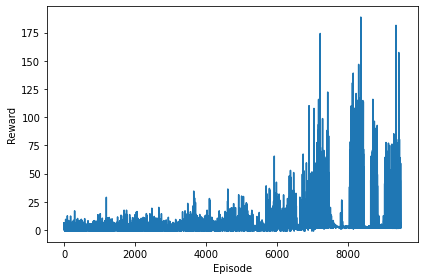

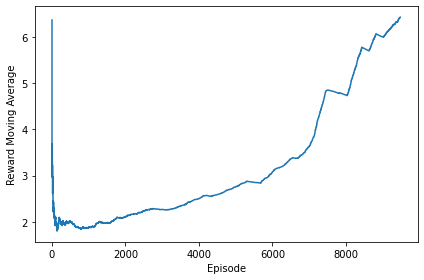

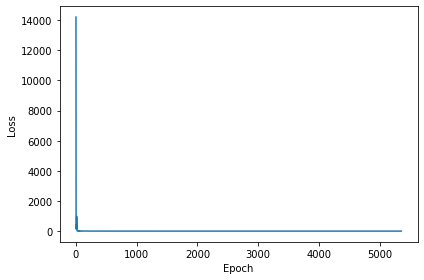

In [8]:
    plt.figure()
    plt.plot(range(len(rewards)), rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(range(len(avg_rewards)), avg_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward Moving Average')
    plt.tight_layout()
    plt.show()

    plt.figure()
    plt.plot(range(len(losses)), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()

In [21]:
steps = list(range(1000,150001,1000))

paths = []

for step in steps:
    path = r"models\saved_agent_DDQN_large_150000\DDQN_Agent_large{}.h5".format(step)
    paths.append(path)
#     print(path)

In [22]:
nb_scenario = 5
scores = []

my_score = ScoreL2RPN2020(env,
                          nb_scenario=nb_scenario,
                          env_seeds=[0 for _ in range(nb_scenario)],
                          agent_seeds=[0 for _ in range(nb_scenario)])

for path in paths:
    
    agent = D3QNAgent(env.observation_space,
                      env.action_space,
                      name="DDQN_large",
                      is_training=False)
    agent.load(path)
    scores.append(my_score.get(agent))
#     print(scores)

Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large1000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large2000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large3000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large4000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large5000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large6000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large7000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large8000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large9000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large10000.h5
Successfully loaded network from: models\saved_ag

Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large87000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large88000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large89000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large90000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large91000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large92000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large93000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large94000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large95000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large96000.h5
Successfully loaded network from: models

In [23]:
with open('D3QN_baseline_large_train_scores.data', 'wb') as file:
    # store the data as binary data stream
    pickle.dump(scores, file)

# Validation

In [9]:
env_val = grid2op.make('l2rpn_neurips_2020_track1_large_val',
                       action_class=TopologyChangeAndDispatchAction,
                       reward_class=CombinedScaledReward)

In [10]:
steps = list(range(1000,150001,1000))

paths = []

for step in steps:
    path = r"models\saved_agent_DDQN_large_150000\DDQN_Agent_large{}.h5".format(step)
    paths.append(path)
#     print(path)

In [13]:
nb_scenario = 5
scores = []

my_score = ScoreL2RPN2020(env_val,
                      nb_scenario=nb_scenario,
                      env_seeds=[0 for _ in range(nb_scenario)],
                      agent_seeds=[0 for _ in range(nb_scenario)])

for path in paths:
    
    agent = D3QNAgent(env_val.observation_space,
                      env_val.action_space,
                      name="DDQN_large",
                      is_training=False)
    agent.load(path)
    scores.append(my_score.get(agent))
#     print(scores)

Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large1000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large2000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large3000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large4000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large5000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large6000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large7000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large8000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large9000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large10000.h5
Successfully loaded network from: models\saved_ag

Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large87000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large88000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large89000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large90000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large91000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large92000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large93000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large94000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large95000.h5
Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large96000.h5
Successfully loaded network from: models

In [14]:
with open('D3QN_baseline_large_scores.data', 'wb') as file:
    # store the data as binary data stream
    pickle.dump(scores, file)

In [15]:
scores_only = [score[0] for score in scores]
val_scores_avg = np.mean(scores_only, axis = 1)
best_agent = np.argmax(val_scores_avg)
print("the best agent index: {}".format(best_agent))

the best agent index: 5


# Test

In [2]:
env_test = grid2op.make('l2rpn_neurips_2020_track1_large_test',
                        action_class=TopologyChangeAndDispatchAction,
                        reward_class=CombinedScaledReward)
# Only load 128 steps in ram
env_test.chronics_handler.set_chunk_size(128)

In [8]:
nb_scenario = 10
path = r"models\saved_agent_DDQN_large_150000\DDQN_Agent_large6000.h5"
test_scores = []

agent = D3QNAgent(env_test.observation_space,
                      env_test.action_space,
                      name="DDQN_large",
                      is_training=False)
agent.load(path)

for seed in range(3):
    path_save = "saved_agent_DDQN_150000_results{}".format(seed)
    my_score = ScoreL2RPN2020(env_test,
                              nb_scenario=nb_scenario,
                              env_seeds=[seed for _ in range(nb_scenario)],
                              agent_seeds=[seed for _ in range(nb_scenario)])

    test_scores.append(my_score.get(agent, path_save=path_save))
# print(test_scores)

Successfully loaded network from: models\saved_agent_DDQN_large_150000\DDQN_Agent_large6000.h5


In [43]:
test_scores_only = [score[0] for score in test_scores]

mean_test_scenarios_score = np.mean(test_scores_only, axis=0)
std_test_scenarios_score = np.std(test_scores_only, axis= 0)
mean_test_score = np.mean(mean_test_scenarios_score)
std_mean_test_score = np.std(mean_test_scenarios_score)

In [44]:
print("Test score over 10 scenarios (average over 3 runs): {} +\- {}".format(mean_test_scenarios_score, std_test_scenarios_score))
print("Mean test score: {} +\- {}".format(mean_test_score, std_mean_test_score))

Test score over 10 scenarios (average over 3 runs): [-26.96782651 -24.73544654 -24.43118663 -26.81596621 -32.71984376
 -30.51232826 -24.42808532 -26.37534192 -24.53636437 -31.7116629 ] +\- [44.20271242 41.14417925 40.57773355 43.89560776 46.29522659 43.17176723
 40.65981667 43.3826244  40.84402352 44.61830461]
Mean test score: -27.32340524323713 +\- 3.0173377608418117


#  Scenario Analysis

In [4]:
from grid2op.Episode import EpisodeData
from grid2op.Episode import EpisodeReplay

In [15]:
path_save = 'saved_agent_DDQN_150000_results1'

In [16]:
episode_studied = "Scenario_april_062"
this_episode = EpisodeData.from_disk(path_save, episode_studied)

In [17]:
attacks =[]
timesteps = []
step = 0

for attack in this_episode.attacks:
    if attack != env_test.action_space():
        if attack not in attacks:
            attacks.append(attack)
            timesteps.append(step)
            print(attack)
            print(step)
    step += 1

In [18]:
step = 0
actions =[]
act_timesteps = []

for action in this_episode.actions:
    if action != env_test.action_space():
        if action not in actions:
            actions.append(action)
            timesteps.append(step)
            print(action)
            print(step)
    step += 1

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of line (origin) id 38 [on substation 23]
	 - NOT force any particular bus configuration
3
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of generator id 2 [on substation 9]
	 	 - Switch bus of generator id 3 [on substation 9]
	 - NOT force any particular bus configuration
82


<ipython-input-20-dd205b30e9e5>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


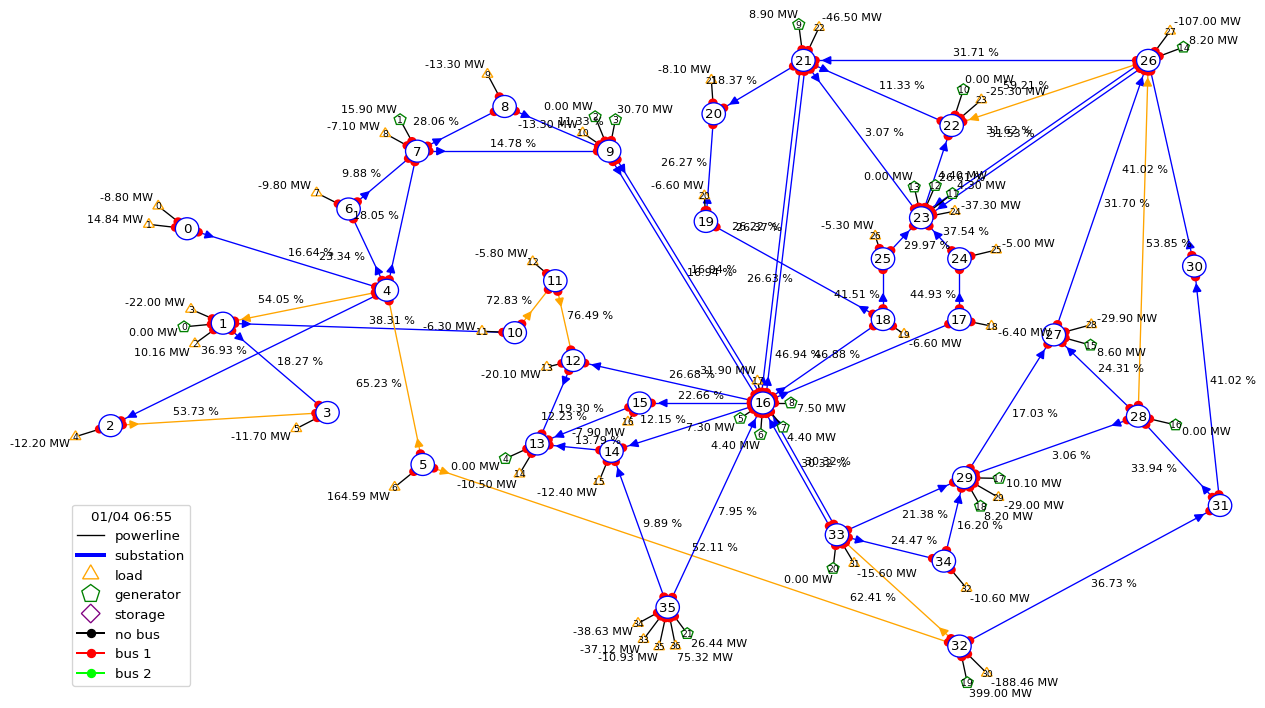

In [20]:
last_obs = copy.deepcopy(this_episode.observations[-1])

plot_helper1 = PlotMatplot(observation_space=this_episode.observation_space)
fig = plot_helper1.plot_obs(last_obs)
fig.savefig("last obs baseline 062")
fig.show()

In [25]:
path_save = 'saved_agent_DDQN_150000_results1'

In [24]:
episode_studied = "Scenario_april_170"
this_episode = EpisodeData.from_disk(path_save, episode_studied)

In [14]:
attacks =[]
timesteps = []
step = 0

for attack in this_episode.attacks:
    if attack != env_test.action_space():
        if attack not in attacks:
            attacks.append(attack)
            timesteps.append(step)
            print(attack)
            print(step)
    step += 1
    


In [13]:
step = 0
actions =[]
act_timesteps = []

for action in this_episode.actions:
    if action != env_test.action_space():
        if action not in actions:
            actions.append(action)
            timesteps.append(step)
            print(action)
            print(step)
    step += 1

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of line (origin) id 38 [on substation 23]
	 - NOT force any particular bus configuration
3
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of generator id 2 [on substation 9]
	 	 - Switch bus of generator id 3 [on substation 9]
	 - NOT force any particular bus configuration
46


<ipython-input-26-847e45d97e46>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


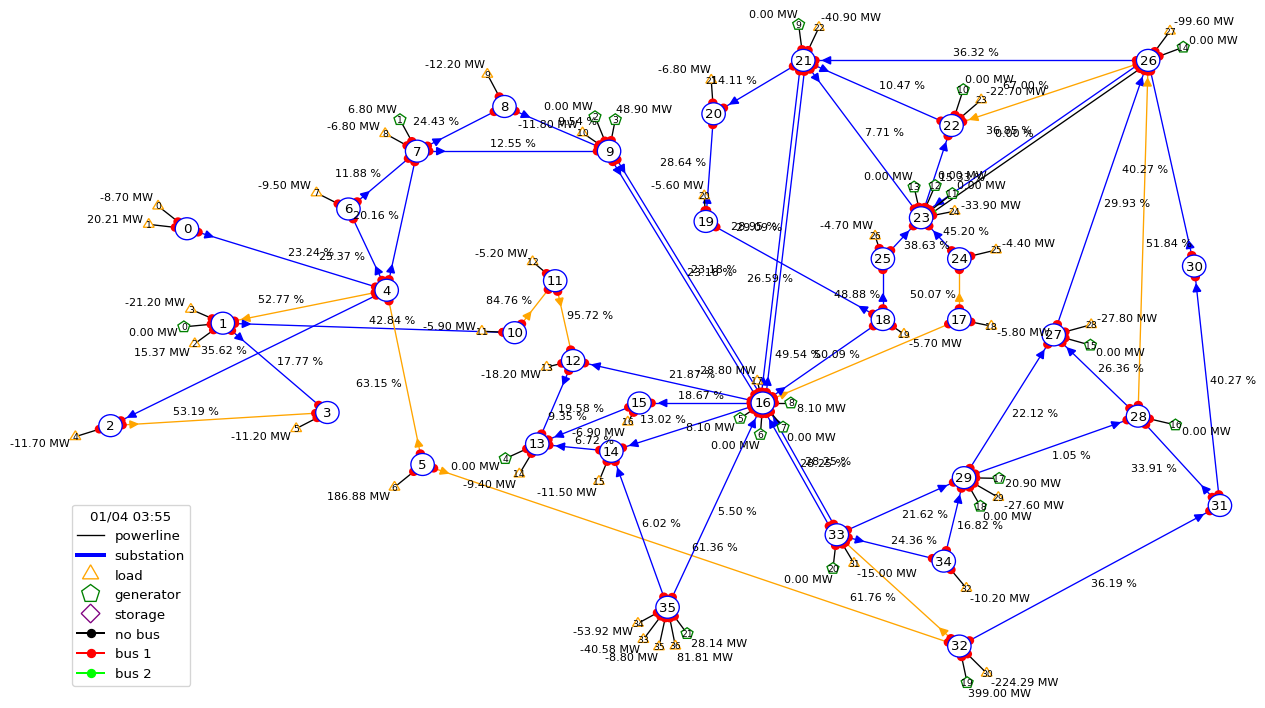

In [26]:
last_obs = copy.deepcopy(this_episode.observations[-1])

plot_helper1 = PlotMatplot(observation_space=this_episode.observation_space)
fig = plot_helper1.plot_obs(last_obs)
fig.savefig("last obs baseline 170")
fig.show()